In [7]:
%matplotlib notebook
import numpy as np
import mne
import mne.export
import matplotlib.pyplot as plt

In [13]:
npzPath = '/blue/gkalamangalam/jmark.ettinger/predictScalp/predictionResults/numpy/results_31_Wake_ME1.npz'

npzfile = np.load(npzPath)

yTrue = npzfile['yTrue']
yPred = npzfile['yPred']

yPred = (yPred - np.mean(yPred))/np.std(yPred)
yTrue = (yTrue - np.mean(yTrue))/np.std(yTrue)

In [16]:
data = np.vstack([yTrue, yPred])
data.shape

ch_names = ['31_F7_Wake_ME1', 'prediction']
sfreq = 128
info = mne.create_info(ch_names, sfreq, ch_types='eeg')

raw = mne.io.RawArray(data, info)

edfPath = '/blue/gkalamangalam/jmark.ettinger/predictScalp/predictionResults/edf/results_31_Wake_ME1.edf'
mne.export.export_raw(edfPath, raw, overwrite=True)

Creating RawArray with float64 data, n_channels=2, n_times=30128
    Range : 0 ... 30127 =      0.000 ...   235.367 secs
Ready.
Overwriting existing file.


/scratch/local/64124934/ipykernel_114284/3798595626.py:11: RuntimeWarning: EDF format requires equal-length data blocks, so 0.625 seconds of zeros were appended to all channels when writing the final block.
  mne.export.export_raw(edfPath, raw, overwrite=True)


<IPython.core.display.Javascript object>


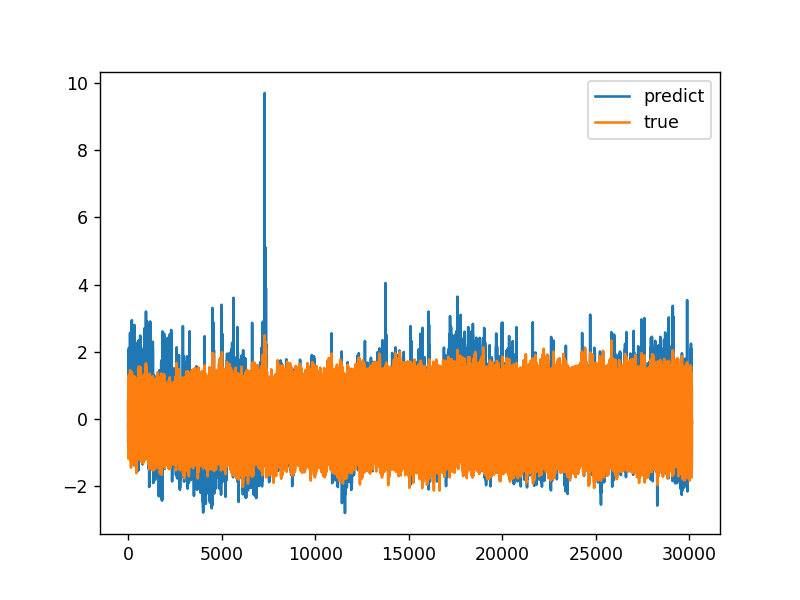

In [15]:
plt.figure()
plt.plot(yPred, label='predict')
plt.plot(yTrue, label='true')
plt.legend()
plt.show()